In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_val_score,
    train_test_split,
)
import seaborn as sns

np.random.seed(42)
pd.set_option("display.max_rows", 80)
pd.set_option("display.width", 1920)
pd.set_option("display.float_format", "{:20,.2f}".format)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.dpi"] = 150


In [2]:
df = pd.read_csv("./normalized_nybnb.csv").astype(np.float32)
X, y = df.drop(columns=["High Review Score"]), df["High Review Score"]

# ros = RandomOverSampler(random_state=42)
# X, y = ros.fit_resample(X, y)
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)

target_names = ["Low Review Score", "High Review Score"]
n_features = X_train.shape[1]


In [3]:
def plot_pair(x):
    df_x = pd.DataFrame(x)
    df_x["High Review Score"] = y
    sns.pairplot(
        df_x,
        hue="High Review Score",
    )

(13260, 32)
(13260, 5)


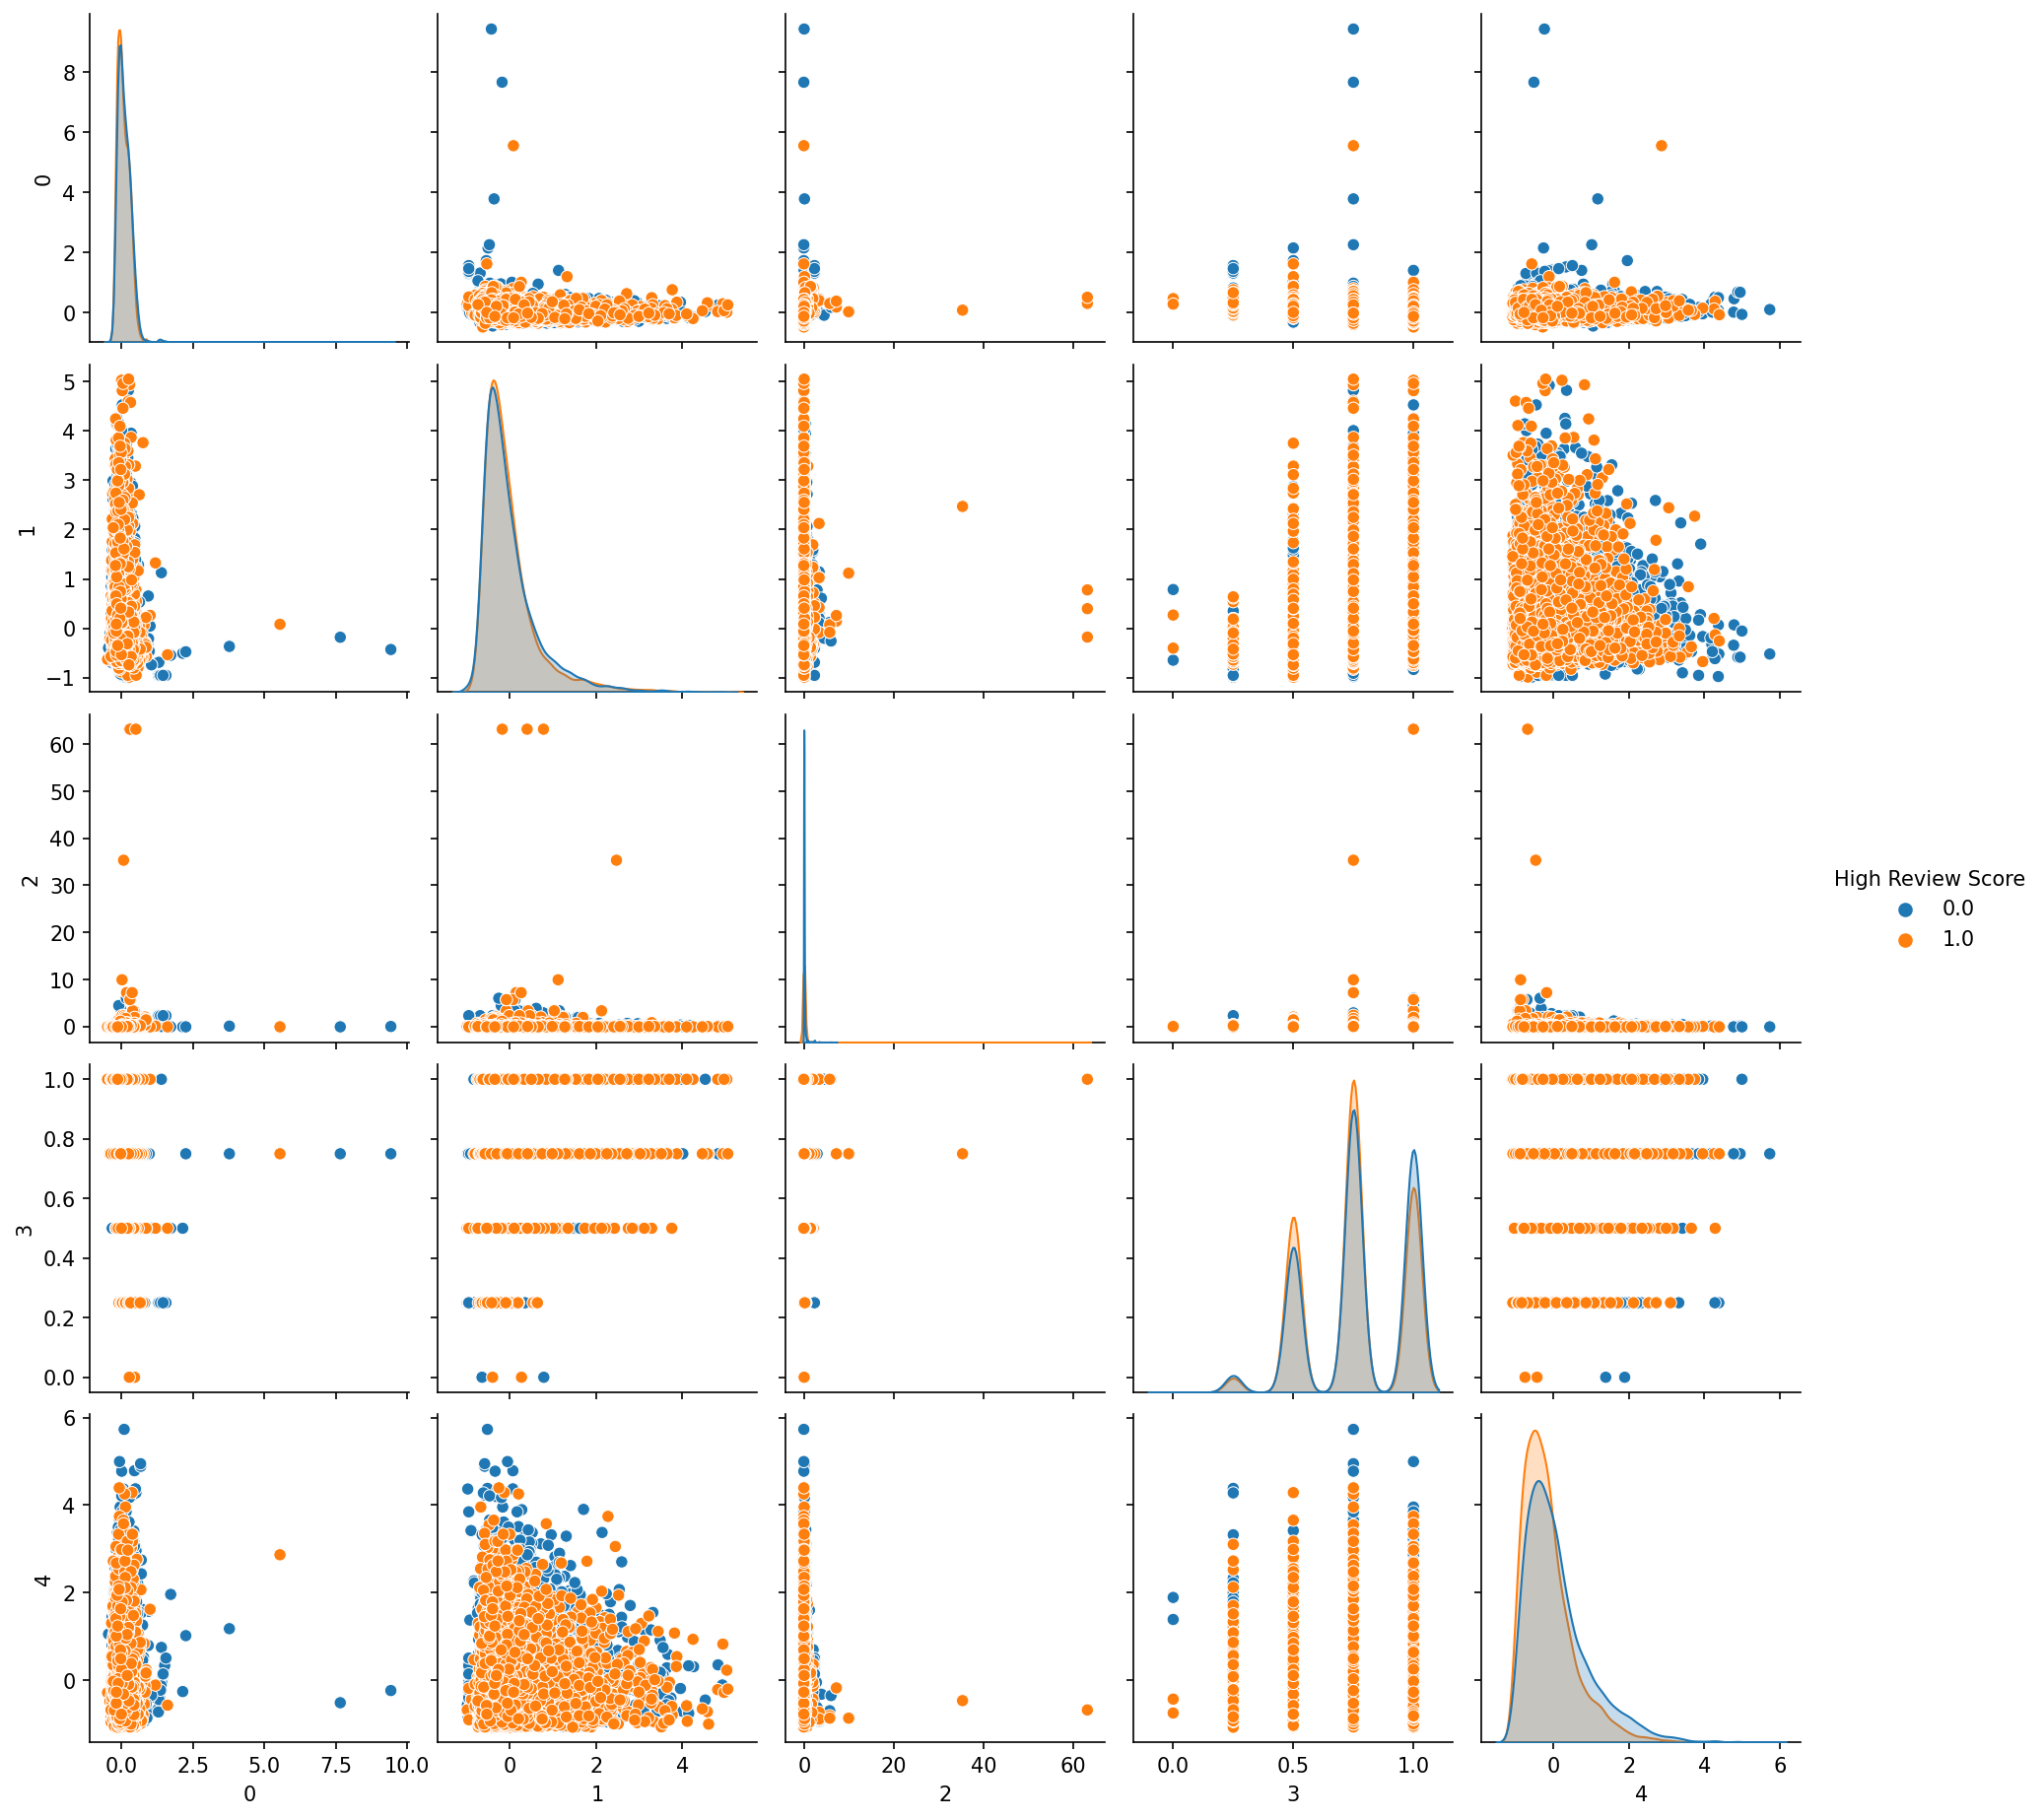

In [4]:
from sklearn.cluster import FeatureAgglomeration

print(X.shape)
X_agglo = FeatureAgglomeration(n_clusters=5).fit_transform(X)
print(X_agglo.shape)
plot_pair(X_agglo)

X_agglo_train, X_agglo_test, _, _ = train_test_split(
    X_agglo,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)


(13260, 32)
(13260, 5)


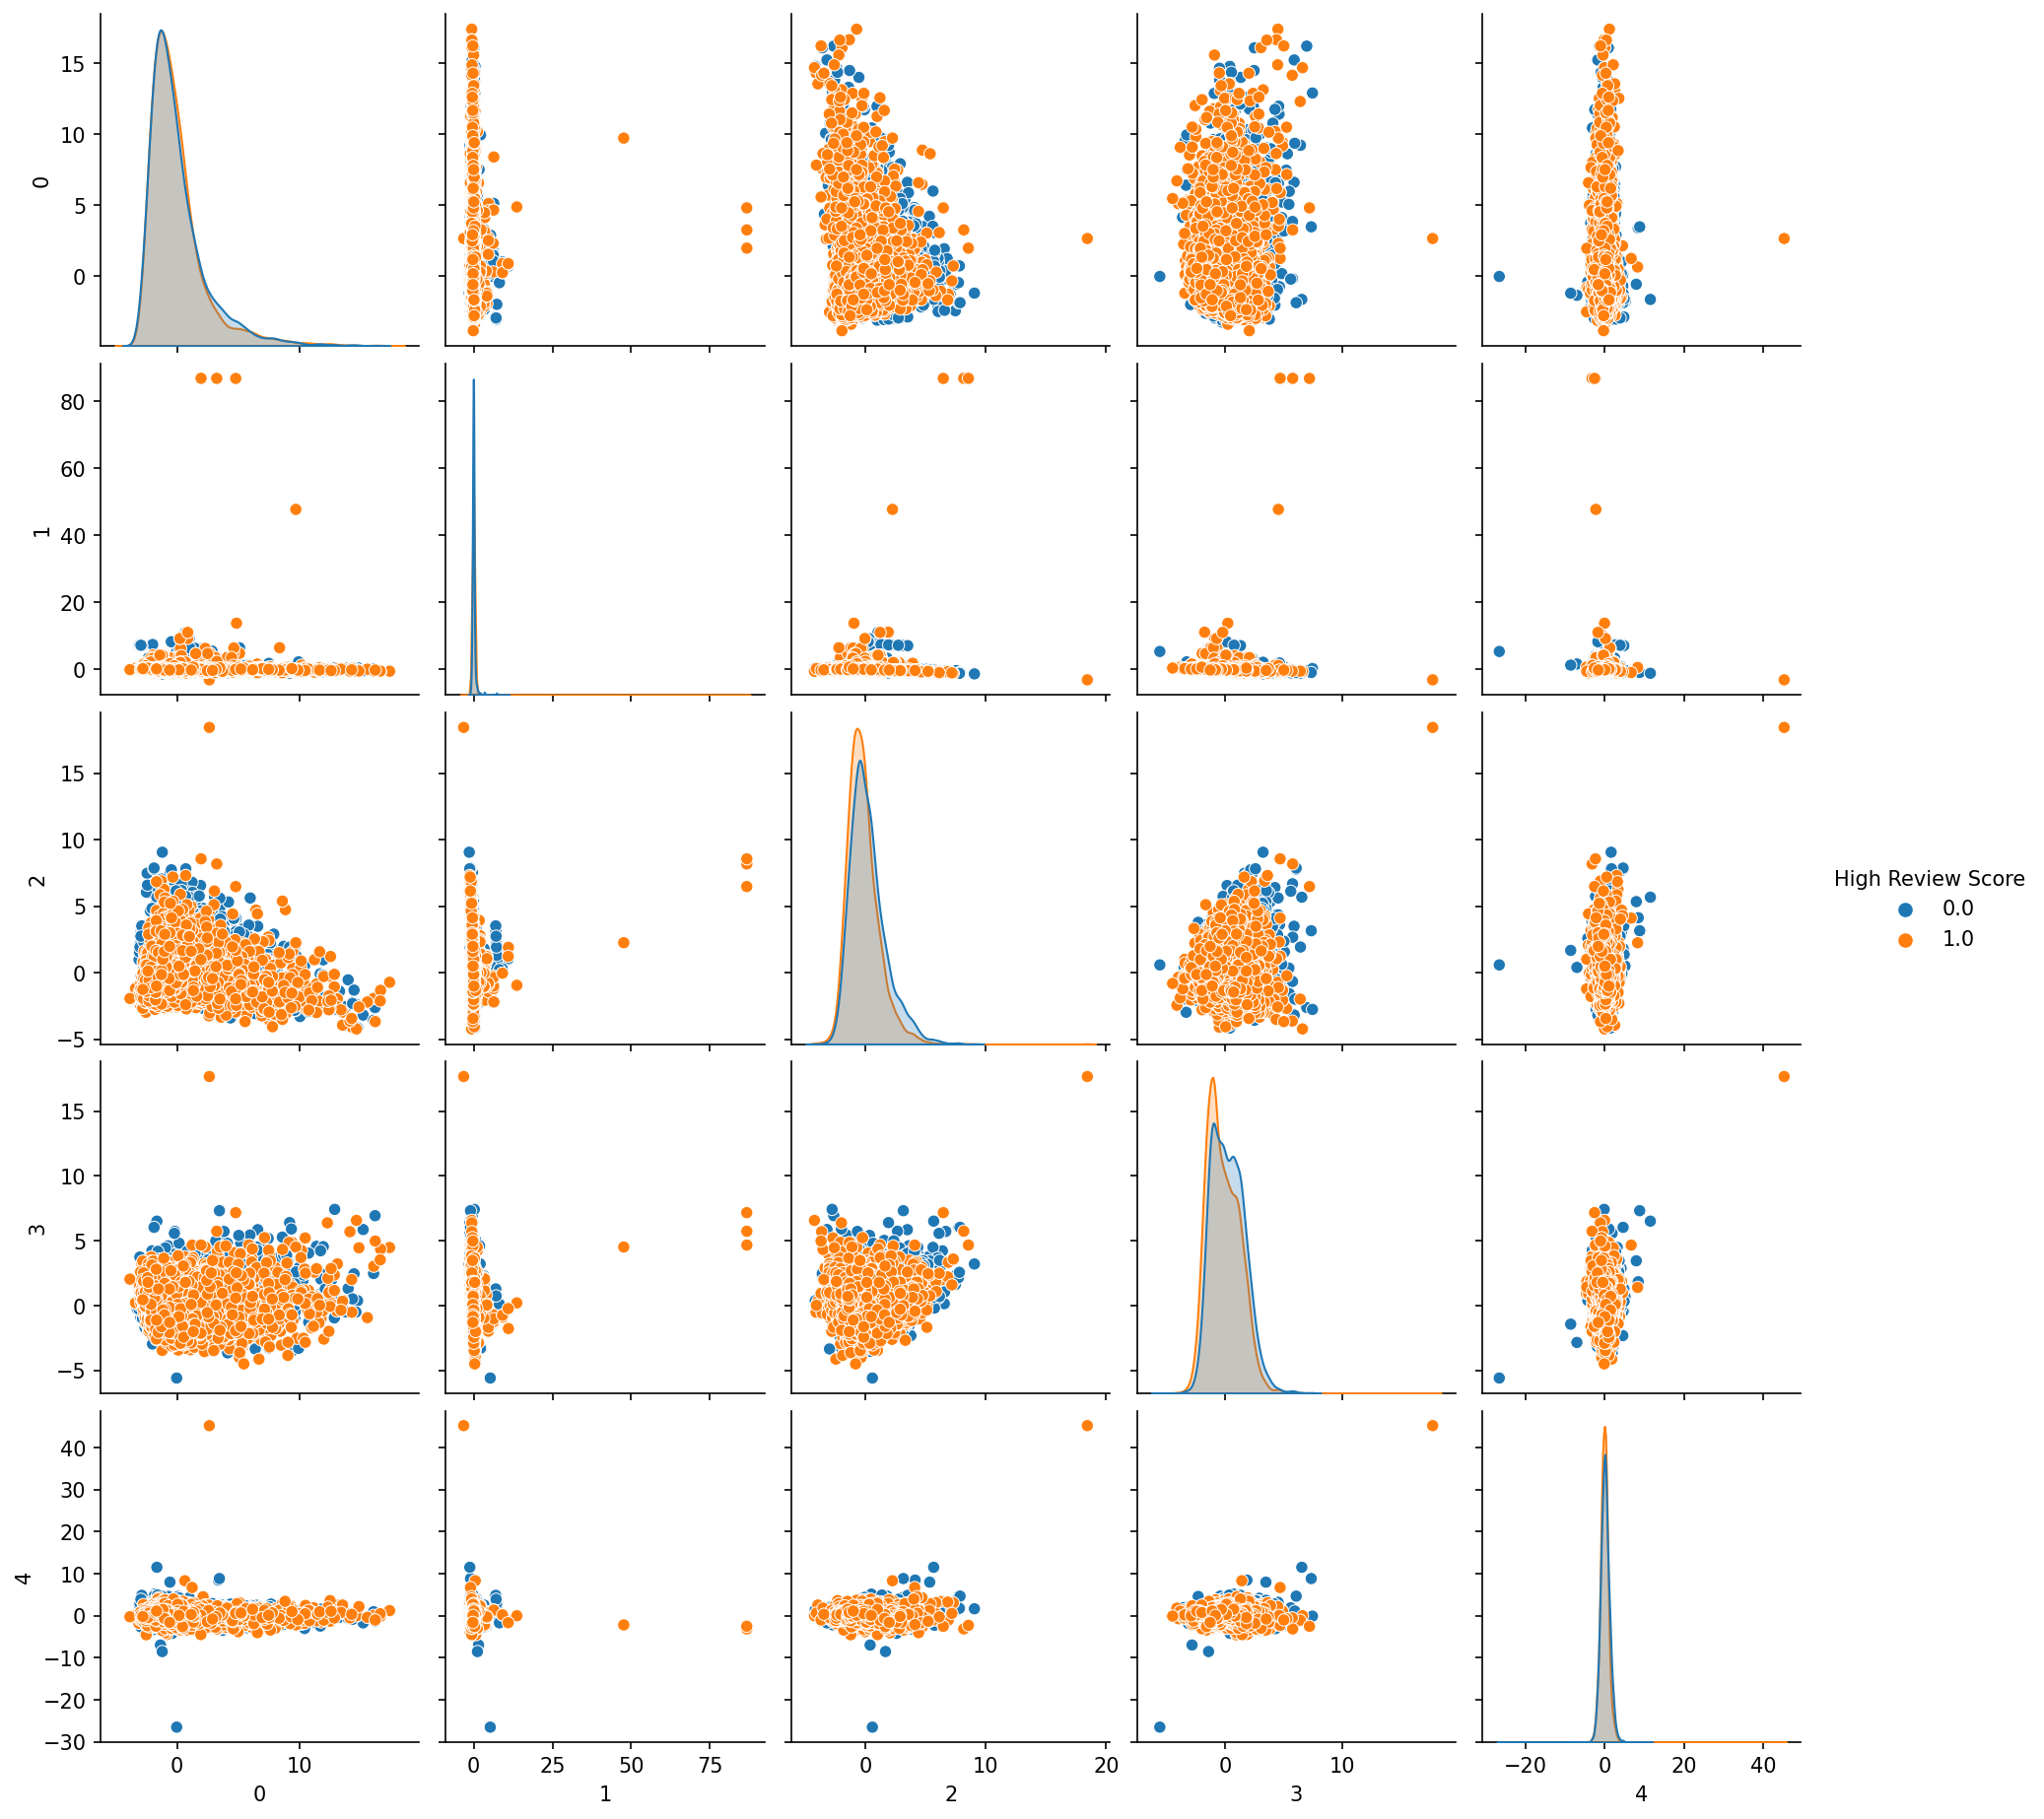

In [5]:
from sklearn.decomposition import PCA

print(X.shape)
X_pca = PCA(n_components=5).fit_transform(X)
print(X_pca.shape)
plot_pair(X_pca)

X_pca_train, X_pca_test, _, _ = train_test_split(
    X_pca,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)

(13260, 32)
(13260, 5)


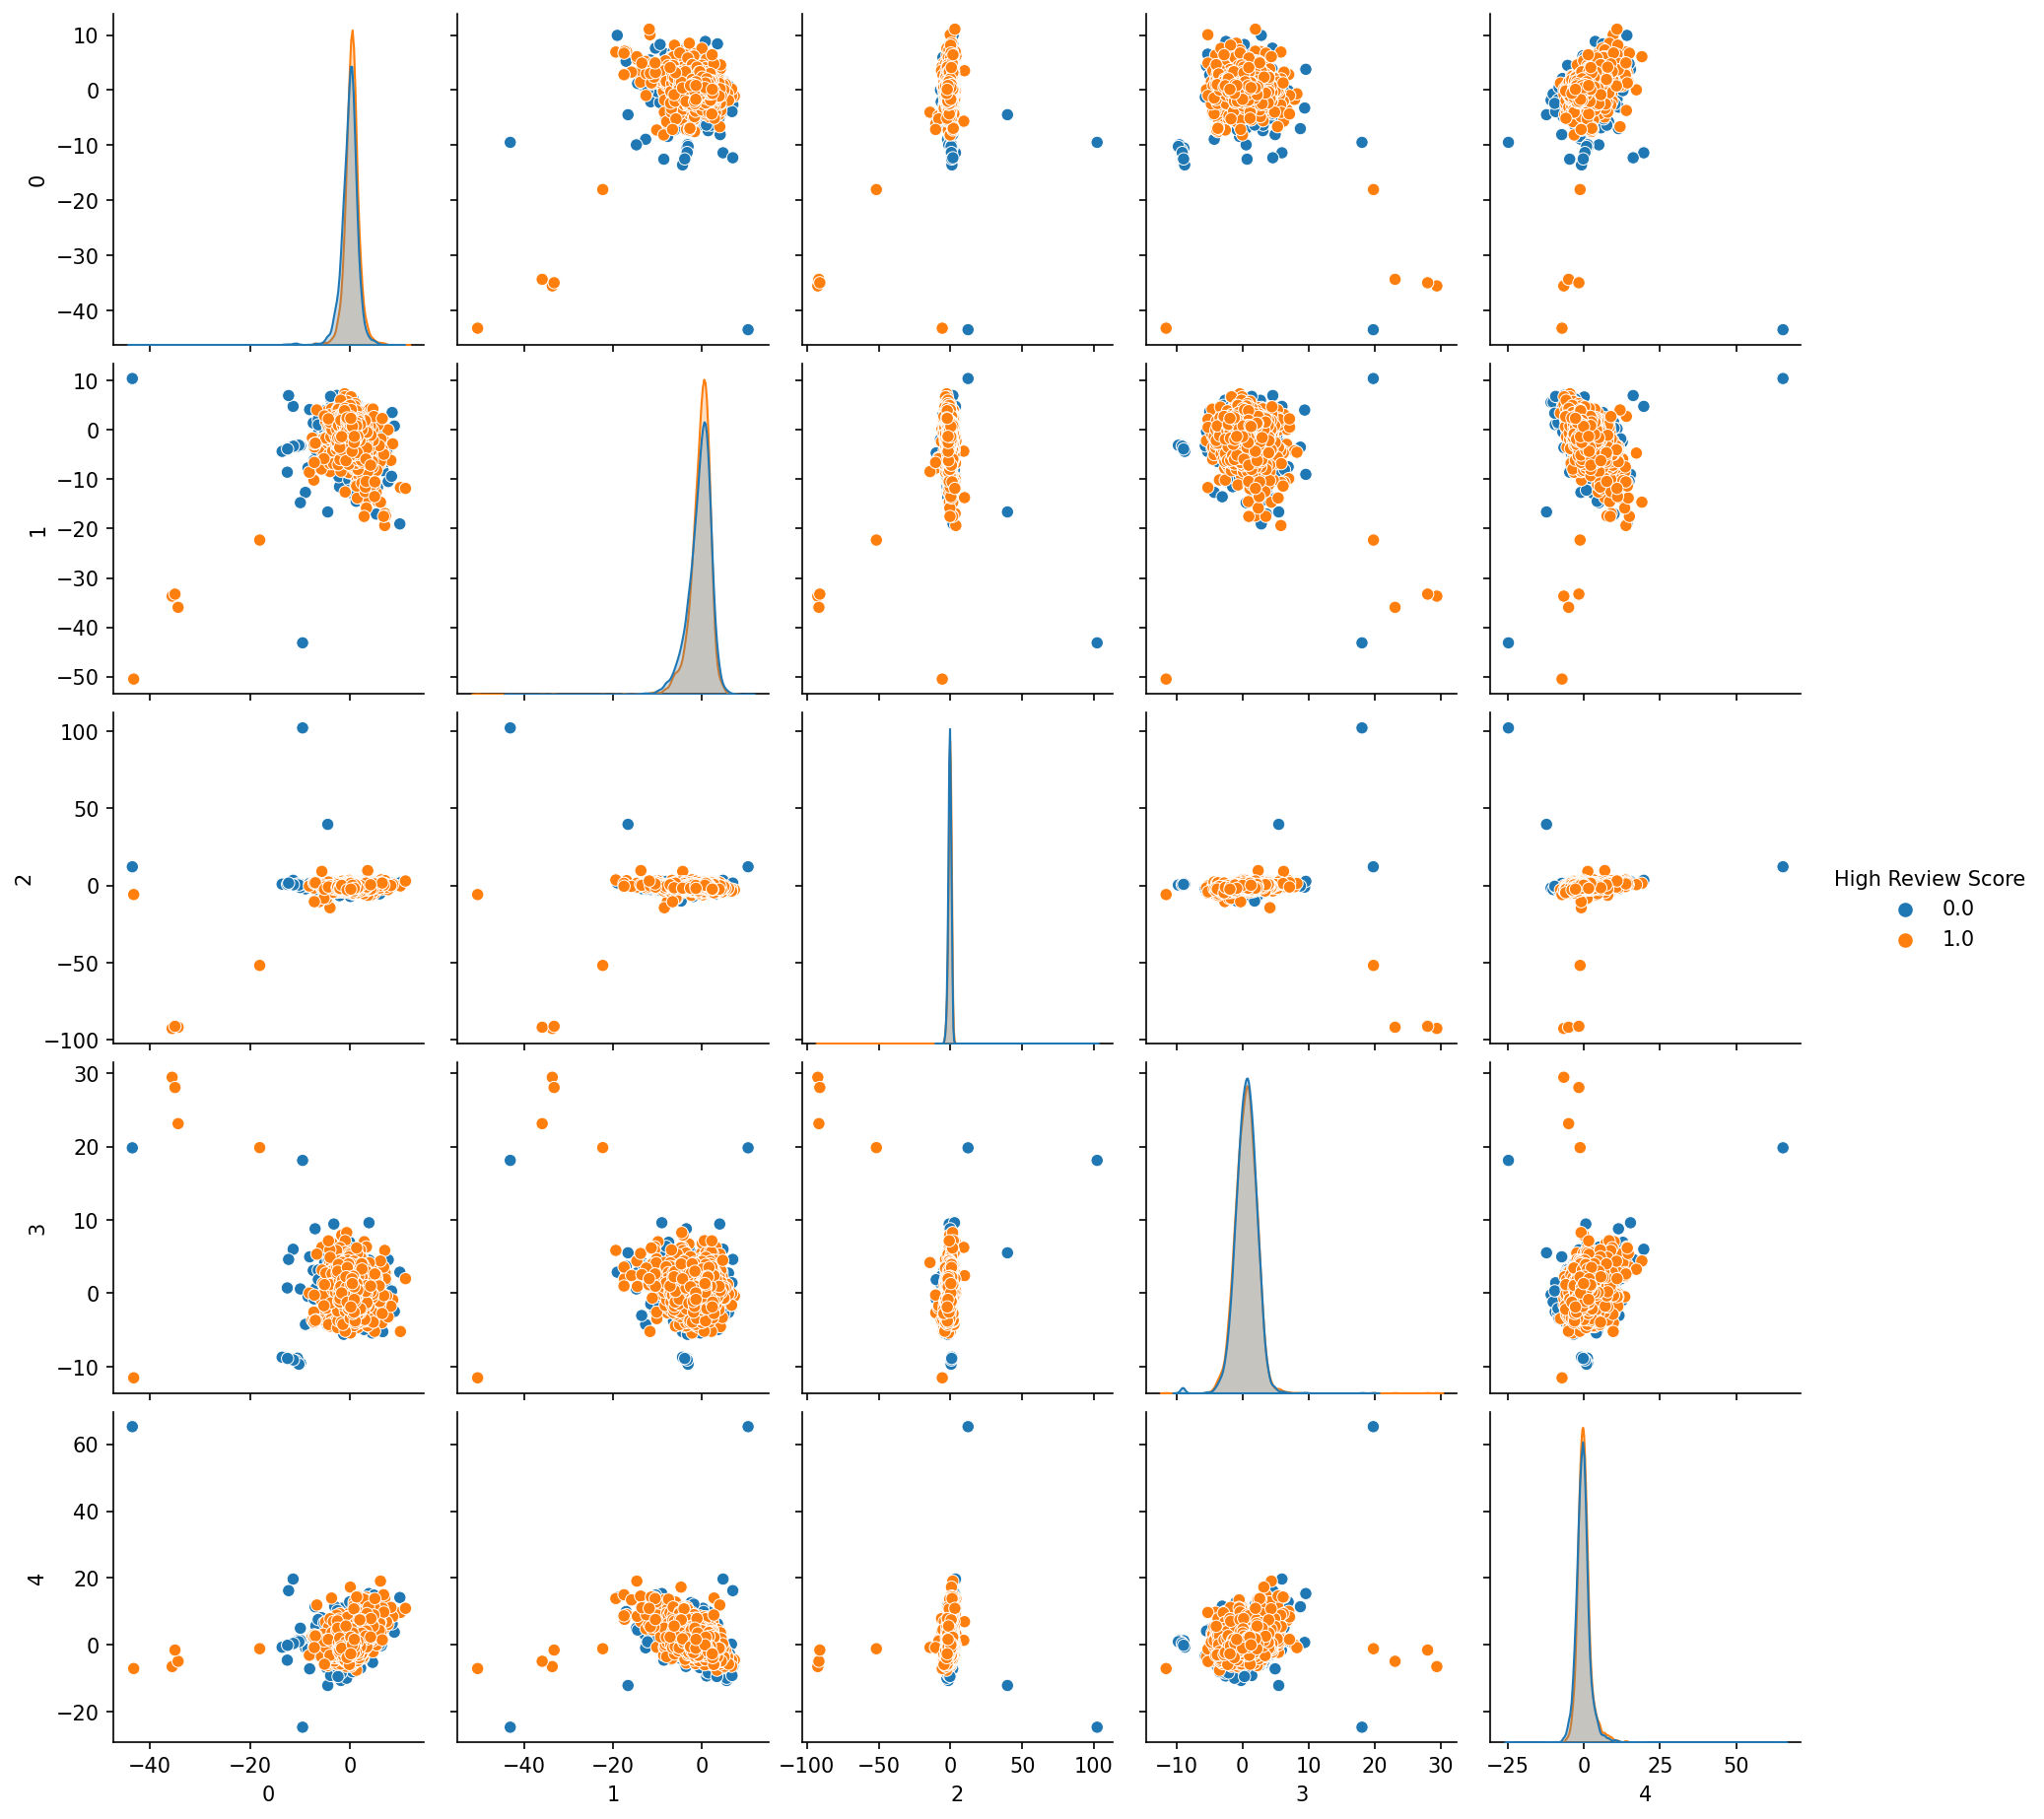

In [6]:
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

print(X.shape)
X_RPgaussian = GaussianRandomProjection(n_components=5).fit_transform(X)
print(X_RPgaussian.shape)
plot_pair(X_RPgaussian)

X_RPgaussian_train, X_RPgaussian_test, _, _ = train_test_split(
    X_RPgaussian,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)

(13260, 32)
(13260, 5)


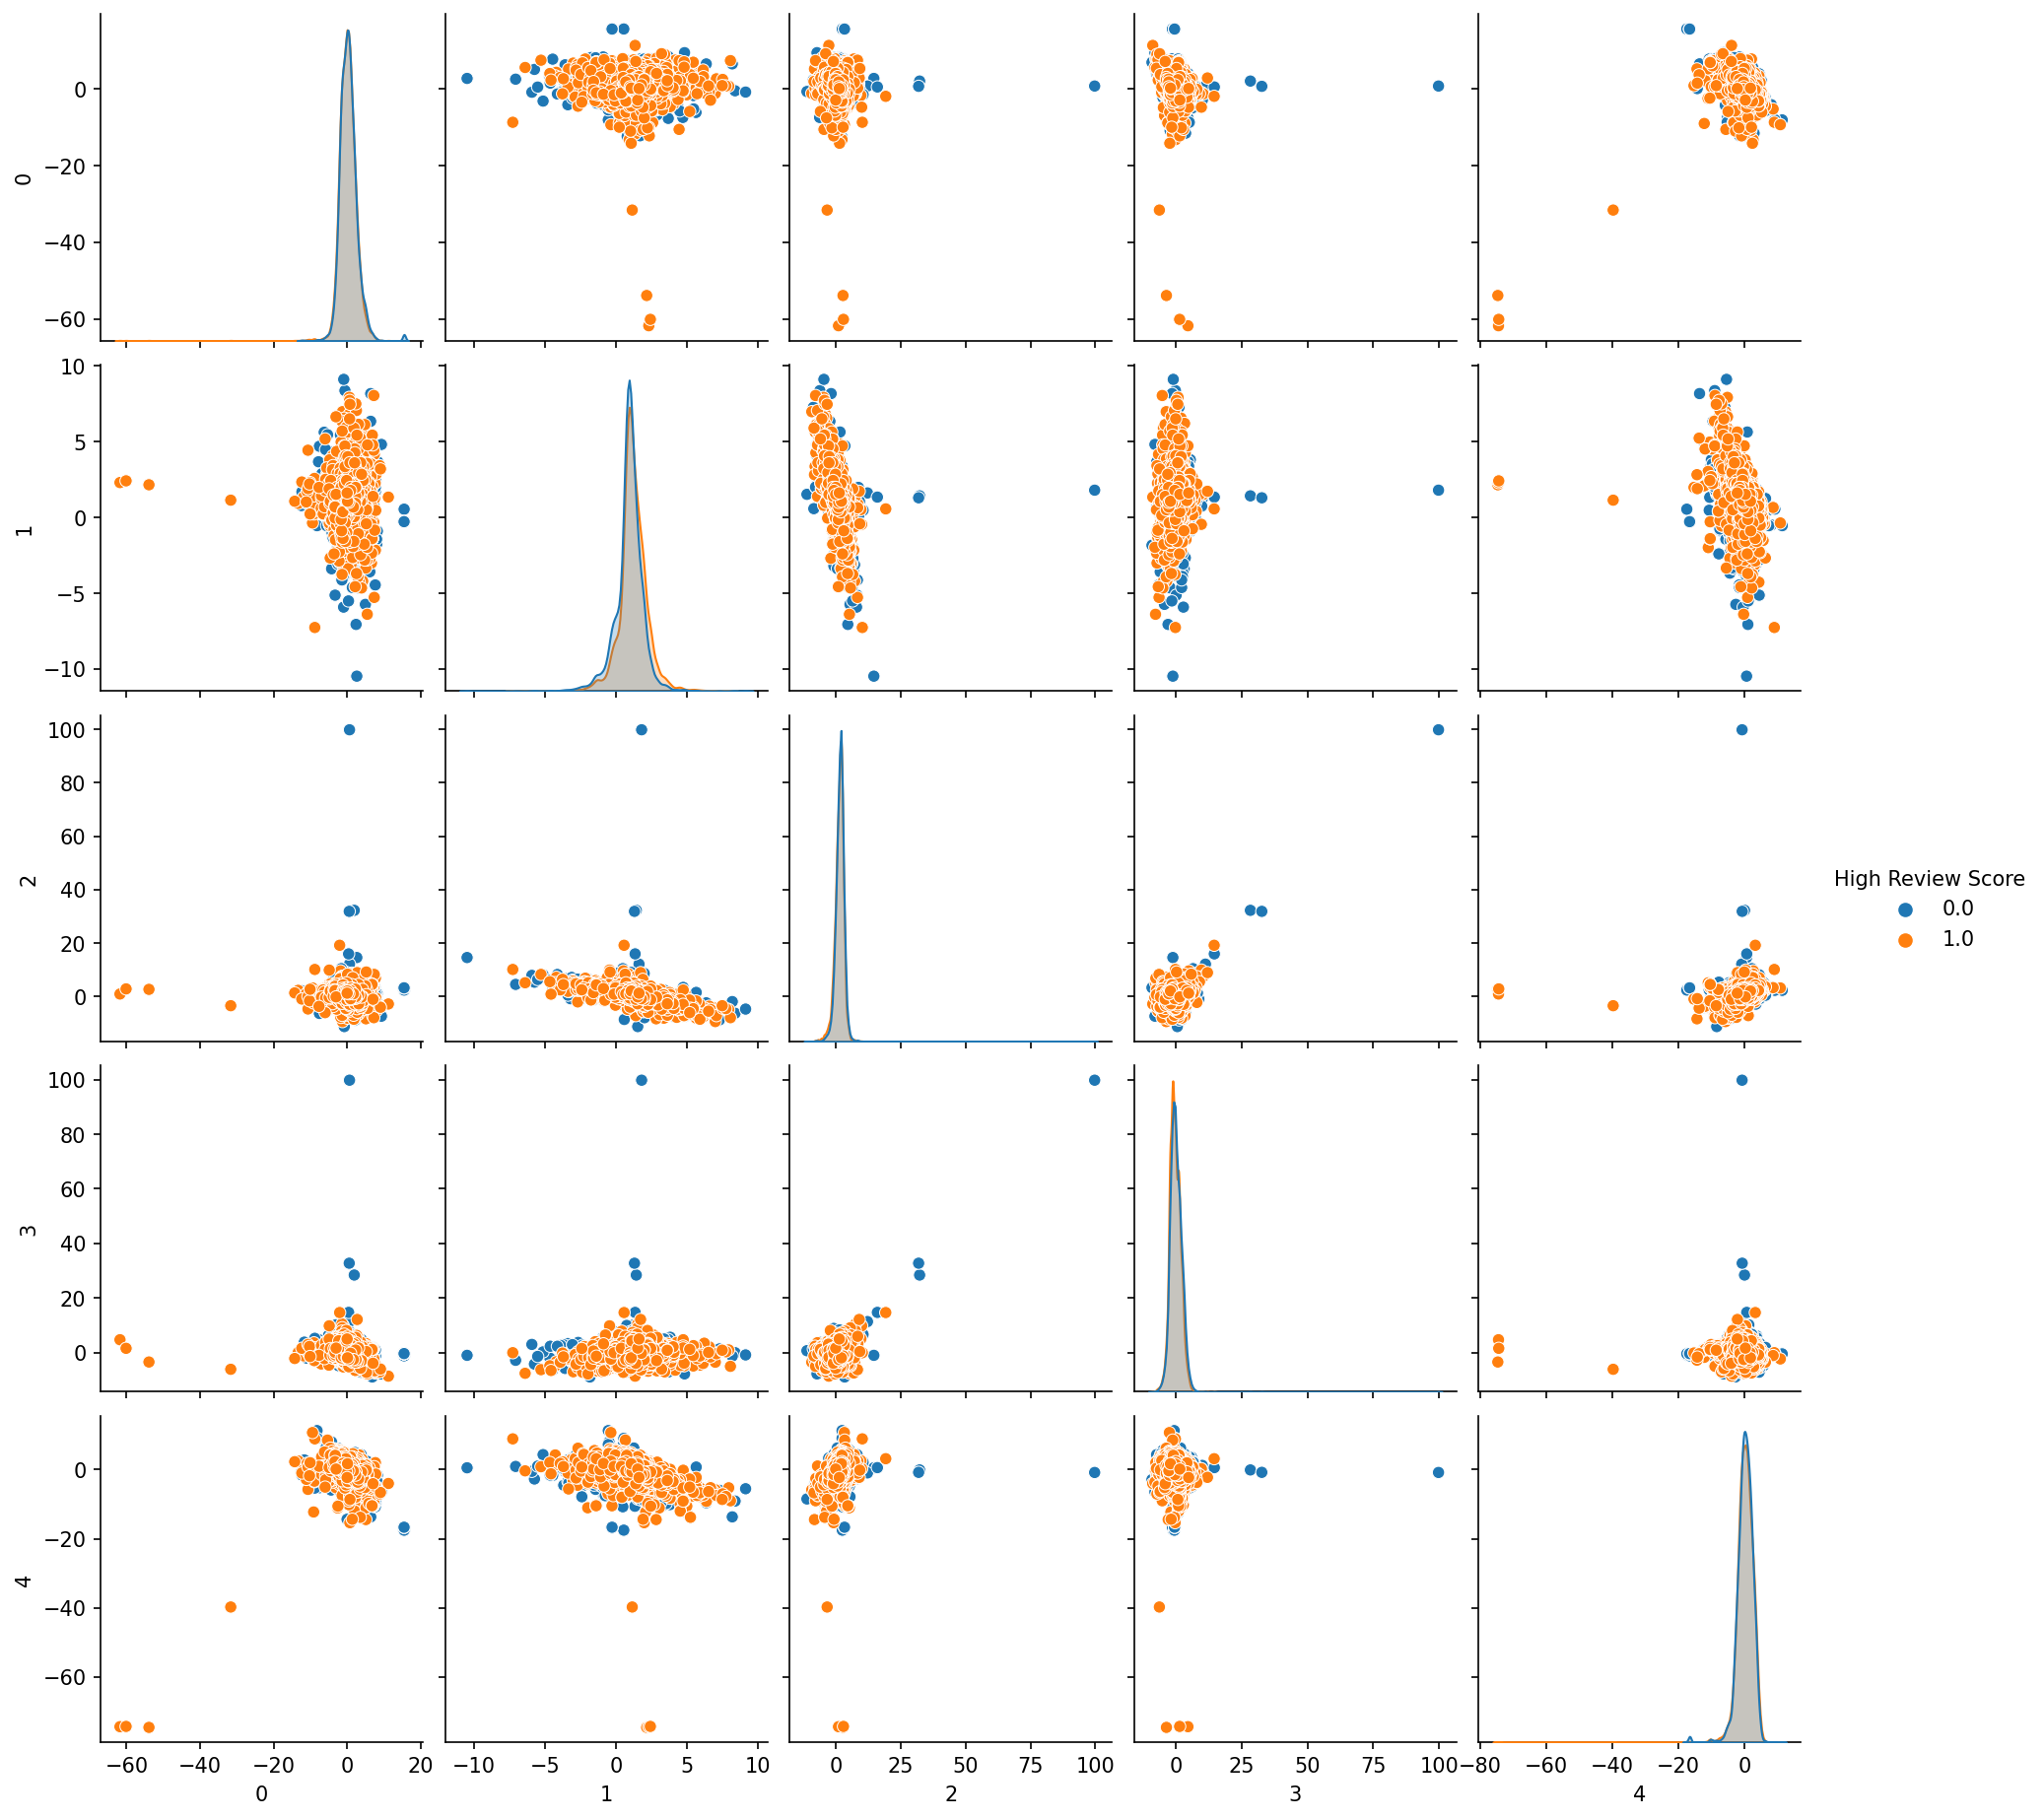

In [7]:
print(X.shape)
X_RPsparse = SparseRandomProjection(n_components=5).fit_transform(X)
print(X_RPsparse.shape)
plot_pair(X_RPsparse)

X_RPsparse_train, X_RPsparse_test, _, _ = train_test_split(
    X_RPsparse,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)

In [8]:
X_ori = X

X = X_pca
X_train, X_test = X_pca_train, X_pca_test

Birch Birch(n_clusters=2)
Test metrics
Birch
Accuracy :  0.5
Balanced Accuracy :  0.5
[[663   0]
 [663   0]]
                   precision    recall  f1-score   support

 Low Review Score       0.50      1.00      0.67       663
High Review Score       0.00      0.00      0.00       663

         accuracy                           0.50      1326
        macro avg       0.25      0.50      0.33      1326
     weighted avg       0.25      0.50      0.33      1326



i:\SIT\2022F\CS513\final\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\SIT\2022F\CS513\final\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\SIT\2022F\CS513\final\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


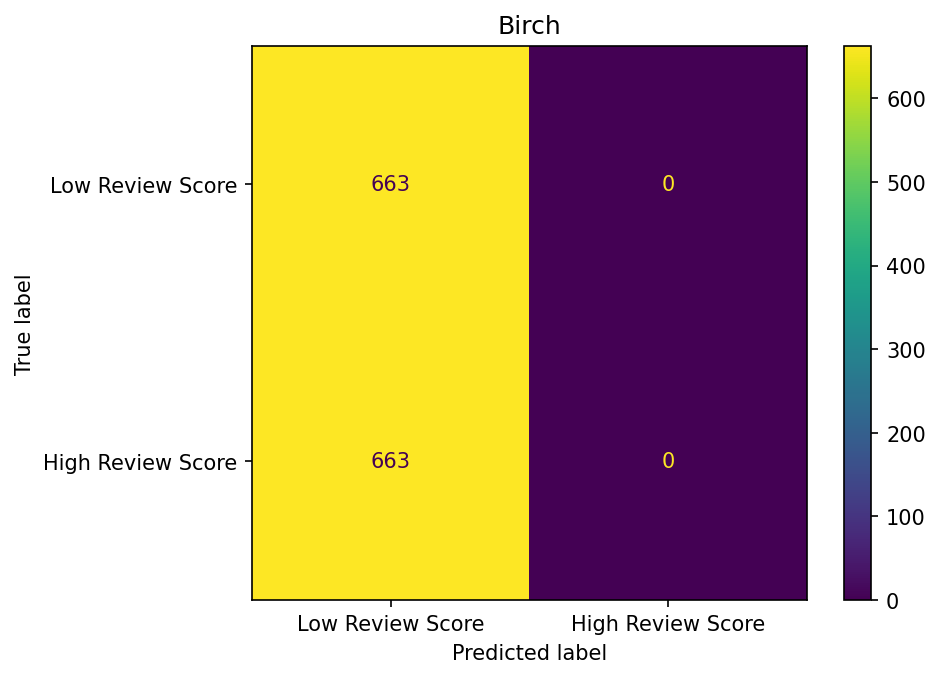

In [9]:
from sklearn.cluster import Birch

clusturing_classifiers = {
    "Birch": Birch(n_clusters=2),
}
for name, cls in clusturing_classifiers.items():
    cls.fit(X_train, y_train)
    print(name, cls)

print('Test metrics')
for name, cls in clusturing_classifiers.items():
    print(name)
    pred = cls.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, pred))
    print("Balanced Accuracy : ", balanced_accuracy_score(y_test, pred))
    print(cm := confusion_matrix(y_test, pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    disp.ax_.set_title(name)
    print(classification_report(y_test, pred, target_names=target_names))


In [11]:
from sklearn.cluster import (
    AgglomerativeClustering,
    DBSCAN,
    KMeans,
    BisectingKMeans,
    MiniBatchKMeans,
    MeanShift,
    OPTICS,
    SpectralClustering,
)

clusters = {
    # "Agglomerative": AgglomerativeClustering(n_clusters=2),
    # "DBSCAN": DBSCAN(),
    "KMeans": KMeans(n_clusters=2),
    "Bisecting KMeans": BisectingKMeans(n_clusters=2),
    "MiniBatchKMeans": MiniBatchKMeans(n_clusters=2),
    # "MeanShift": MeanShift(),
    # "OPTICS": OPTICS(),
    "Spectral": SpectralClustering(n_clusters=2),
}

for name, cls in clusters.items():
    print(name)
    pred = cls.fit_predict(X, y)
    print("Accuracy : ", accuracy_score(y, pred))
    print("Balanced Accuracy : ", balanced_accuracy_score(y, pred))
    print(cm := confusion_matrix(y, pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    disp.ax_.set_title(name)
    print(classification_report(y, pred, target_names=target_names))


KMeans
Accuracy :  0.4883107088989442
Balanced Accuracy :  0.4883107088989442
[[5663  967]
 [5818  812]]
                   precision    recall  f1-score   support

 Low Review Score       0.49      0.85      0.63      6630
High Review Score       0.46      0.12      0.19      6630

         accuracy                           0.49     13260
        macro avg       0.47      0.49      0.41     13260
     weighted avg       0.47      0.49      0.41     13260

Bisecting KMeans
Accuracy :  0.5116892911010558
Balanced Accuracy :  0.5116892911010558
[[ 967 5663]
 [ 812 5818]]
                   precision    recall  f1-score   support

 Low Review Score       0.54      0.15      0.23      6630
High Review Score       0.51      0.88      0.64      6630

         accuracy                           0.51     13260
        macro avg       0.53      0.51      0.44     13260
     weighted avg       0.53      0.51      0.44     13260

MiniBatchKMeans
Accuracy :  0.49095022624434387
Balanced Accuracy 

i:\SIT\2022F\CS513\final\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
